In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("/content/housing.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# check for null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.shape

(20640, 10)

In [9]:
df.dropna(axis = 0, inplace =True)

In [10]:
df.shape

(20433, 10)

In [11]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [14]:
df.min()

longitude               -124.35
latitude                  32.54
housing_median_age          1.0
total_rooms                 2.0
total_bedrooms              1.0
population                  3.0
households                  1.0
median_income            0.4999
median_house_value      14999.0
ocean_proximity       <1H OCEAN
dtype: object

In [15]:
df.max()

longitude                -114.31
latitude                   41.95
housing_median_age          52.0
total_rooms              39320.0
total_bedrooms            6445.0
population               35682.0
households                6082.0
median_income            15.0001
median_house_value      500001.0
ocean_proximity       NEAR OCEAN
dtype: object

In [16]:
# using a label encoder to encode the categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df["ocean_proximity"] = le.fit_transform(df["ocean_proximity"])

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [20]:
# Using to minMaxScaler to normalize the data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75


In [23]:
import seaborn as sns

<Axes: >

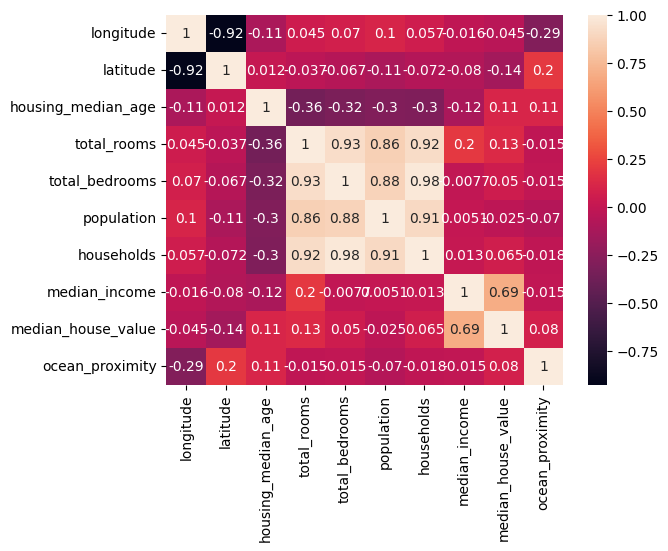

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
# Features higher than 0.5
correlation_matrix = df.corr()

# Select features with correlations higher than 0.5
high_corr_features = correlation_matrix[abs(correlation_matrix) >= 0.5]
high_corr_features = high_corr_features.stack().reset_index()
high_corr_features = high_corr_features[high_corr_features['level_0'] != high_corr_features['level_1']] # Exclude self-correlations
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Print or use the selected features
print(high_corr_features)

             Feature 1           Feature 2  Correlation
1            longitude            latitude    -0.924616
2             latitude           longitude    -0.924616
6          total_rooms      total_bedrooms     0.930380
7          total_rooms          population     0.857281
8          total_rooms          households     0.918992
9       total_bedrooms         total_rooms     0.930380
11      total_bedrooms          population     0.877747
12      total_bedrooms          households     0.979728
13          population         total_rooms     0.857281
14          population      total_bedrooms     0.877747
16          population          households     0.907186
17          households         total_rooms     0.918992
18          households      total_bedrooms     0.979728
19          households          population     0.907186
22       median_income  median_house_value     0.688355
23  median_house_value       median_income     0.688355


In [26]:
# Calculate unique features
all_features = pd.concat([high_corr_features['Feature 1'], high_corr_features['Feature 2']])
unique_features = all_features.unique()

# AgglomerativeClusturing using Standard Scaler

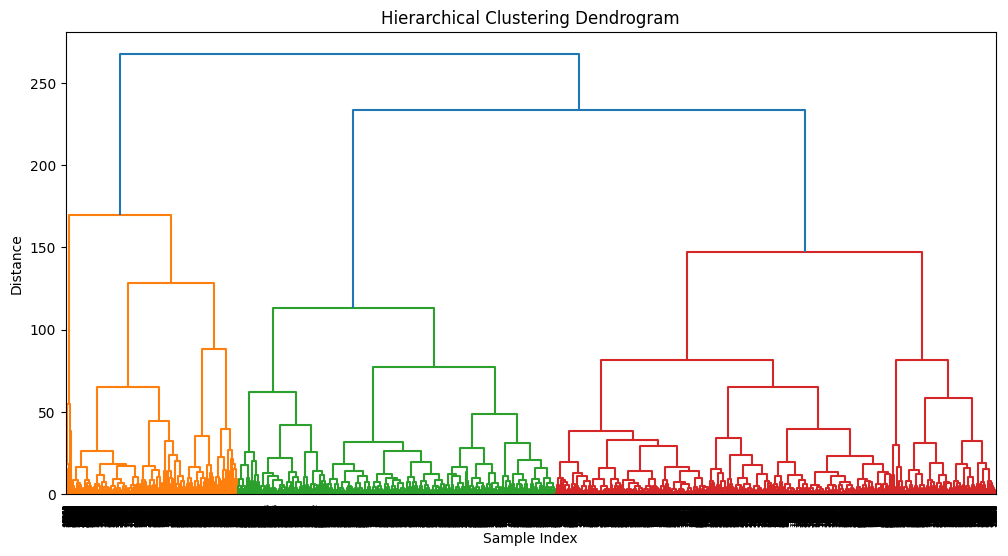

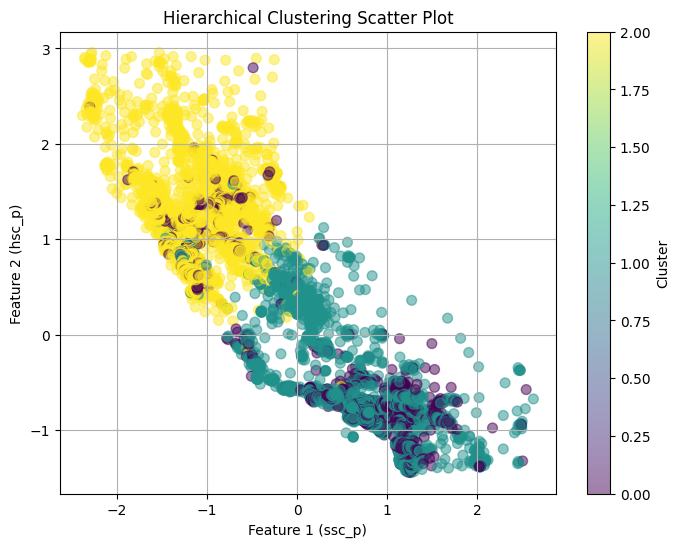

In [37]:
# AgglomerativeClusturing using Standard Scaler

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[unique_features])
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
# Perform clustering based on a certain number of clusters
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X)
# Plot scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Feature 1 (ssc_p)')
plt.ylabel('Feature 2 (hsc_p)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
silhouette_algo_withStandardScaler = silhouette_score(X, labels)

In [40]:
print(silhouette_algo_withStandardScaler)

0.27459936694832493


# AgglomerativeClusturing using MinMaxScaler



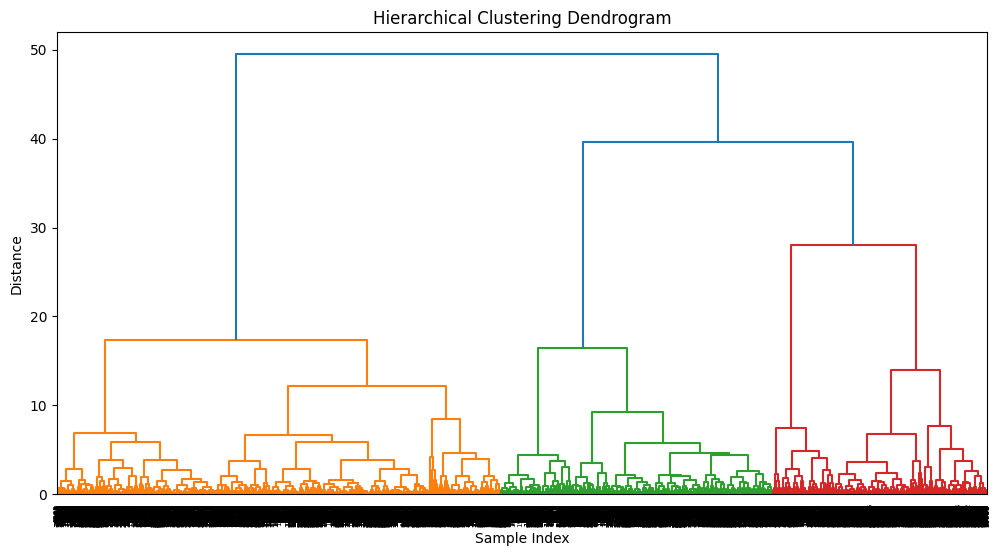

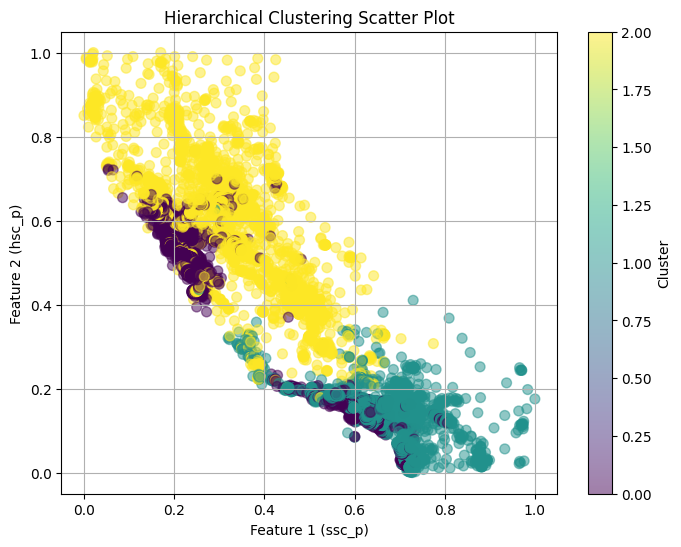

In [43]:
# AgglomerativeClusturing using MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
# Standardize the features
scaler = MinMaxScaler()
y = df[unique_features]
X = scaler.fit_transform(y)
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
# Perform clustering based on a certain number of clusters
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X)
# Plot scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Feature 1 (ssc_p)')
plt.ylabel('Feature 2 (hsc_p)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [45]:
silhouette_algo_withMinMax = silhouette_score(X, labels)

In [46]:
print(silhouette_algo_withMinMax)

0.3895343143301062


# KMeans

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Initialize the KMeans model
kmeans = KMeans(n_clusters=15, random_state=42)
# Fit the model to the data
kmeans.fit(X)
# Predict the cluster labels
labels_kmeans = kmeans.predict(X)
# Compute the silhouette score
silhouette_kmeans = silhouette_score(X, labels_kmeans)
print("Silhouette Score for K-Means:", silhouette_kmeans)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means: 0.24515379639324636
